<a href="https://colab.research.google.com/github/Lucho-Pizarro/Portafolio/blob/main/pib_wb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen Ciencia de Datos para la Economía**



**Profesor:** Luis Cuevas

**Alumnos:** Álvaro Gatica, Luis Pizarro

## Instrucciones y datos


*   Etapa 1: Análisis descriptivo e imputación de datos
*   Etapa 2: Reducción de dimensionalidad con PCA
*   Etapa 3: Desarrollo en clases. Modelación mediante algoritmos de clasificación



### Instrucciones


**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente NY.GDP.MKTP.PP.KD de acuerdo con la siguiente indicación.



```python
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])```



### Datos

Comenzaremos este trabajo reuniendo los datos necesarios para poder comenzar a operar con la base de datos.

In [ ]:
# Instalar Biblioeteca

%pip install wbgapi

In [ ]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

In [73]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Ciencia de datos economia/Datos/')

import my_func as fn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar

import wbgapi as wb
help(wb)

Help on package wbgapi:

NAME
    wbgapi

DESCRIPTION
    wbgapi provides a comprehensive interface to the World Bank's data and
    metadata API with built-in pandas integration

PACKAGE CONTENTS
    __version__
    data
    economy
    economy_coder
    economy_metadata
    income
    lending
    region
    series
    series_metadata
    source
    time
    topic
    utils

CLASSES
    builtins.Exception(builtins.BaseException)
        APIError
            APIResponseError
        URLError
    builtins.dict(builtins.object)
        Coder
    builtins.object
        Featureset
        Metadata
        MetadataCollection

    class APIError(builtins.Exception)
     |  APIError(url, msg, code=None)
     |
     |  Method resolution order:
     |      APIError
     |      builtins.Exception
     |      builtins.BaseException
     |      builtins.object
     |
     |  Methods defined here:
     |
     |  __init__(self, url, msg, code=None)
     |      Initialize self.  See help(type(self))

<unknown>:639: SyntaxWarning: invalid escape sequence '\w'
<unknown>:639: SyntaxWarning: invalid escape sequence '\w'
<unknown>:639: SyntaxWarning: invalid escape sequence '\w'
<unknown>:639: SyntaxWarning: invalid escape sequence '\w'
<unknown>:639: SyntaxWarning: invalid escape sequence '\w'


Usando la api del Banco Mundial es posible acceder a estadisticas diversas sobre el desarollo Economico. A continuacion extraeremos informacion de 65 indicadores economcios

In [ ]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [ ]:
paises_web_raw = fn.descargar_en_chunks(indicadores_wb , años = 2023 , chunk_size = 15)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS']
Descargando bloque 2: ['SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 3: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS']
Descargando bloque 4: ['EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE.AR5', 'SE.PRM.NENR', '

Analisis exploratorio de Datos

In [ ]:
paises_web_raw.head(20)

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,8.526678e+10,49.843240,6232464.0,1.677096,16340822.0,8559888.0,52.383460,7780934.0,...,NaN,NaN,65.013,62.775000,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,7.612916e+10,46.170619,7147630.0,2.794068,20723965.0,10467717.0,50.510204,10256248.0,...,NaN,NaN,68.673,66.349000,63.936,2.3,16.8,NaN,NaN,33.0000
3,PSE,West Bank and Gaza,2.769440e+10,NaN,NaN,2.393265,5165775.0,2598445.0,50.301172,2567330.0,...,54.781748,33.968858,71.502,65.170000,59.691,NaN,NaN,86.2802,86.9849,86.6377
5,VNM,Viet Nam,1.359364e+12,48.623244,56799003.0,0.671429,100352192.0,51201223.0,51.021529,49150969.0,...,36.077468,29.637136,79.264,74.588000,69.877,98.7,99.4,75.8894,80.3200,78.0800
7,VUT,Vanuatu,1.030020e+09,46.126995,115453.0,2.324816,320409.0,158611.0,49.502667,161798.0,...,NaN,NaN,73.927,71.477000,69.445,9.0,52.3,NaN,NaN,45.7313
8,UZB,Uzbekistan,3.567971e+11,35.481852,13809189.0,2.021146,35652307.0,17670093.0,49.562271,17982214.0,...,46.465933,45.087905,75.401,72.388000,69.450,70.9,96.8,87.1292,90.9056,89.0136
9,URY,Uruguay,1.052313e+11,46.719084,1761109.0,-0.083552,3388081.0,1745071.0,51.506177,1643010.0,...,101.562689,59.210384,81.920,78.138000,74.192,100.0,100.0,NaN,NaN,89.8960
10,USA,United States,2.497712e+13,45.567571,172300802.0,0.831493,336806231.0,167569583.0,49.752519,169236648.0,...,NaN,NaN,81.100,78.385366,75.800,100.0,100.0,NaN,NaN,93.1444
11,GBR,United Kingdom,3.602178e+12,47.539585,34950053.0,1.304980,68492000.0,34773417.0,50.770041,33718583.0,...,93.725319,67.925537,83.208,81.238098,79.362,100.0,100.0,NaN,NaN,96.2988
12,ARE,United Arab Emirates,7.363772e+11,23.050942,6793436.0,3.977171,10483751.0,3772859.0,35.987679,6710892.0,...,70.177767,54.315438,84.204,82.909000,81.978,100.0,100.0,100.0000,100.0000,100.0000


Al revisar los primeros y ultimos registros se observa que la extraccion de datos contiene datos de paises y areas geograficas. Por lo tanto, se procede a la limpieza de datos

Una vez seleccionado solamente los paises procederemos el analisis exploratorio de los datos

In [ ]:
paises_web_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 265
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  246 non-null    object 
 1   Country                  246 non-null    object 
 2   NY.GDP.MKTP.PP.KD        246 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        221 non-null    float64
 4   SL.TLF.TOTL.IN           221 non-null    float64
 5   SP.POP.GROW              246 non-null    float64
 6   SP.POP.TOTL              246 non-null    float64
 7   SP.POP.TOTL.FE.IN        246 non-null    float64
 8   SP.POP.TOTL.FE.ZS        246 non-null    float64
 9   SP.POP.TOTL.MA.IN        246 non-null    float64
 10  SP.POP.TOTL.MA.ZS        246 non-null    float64
 11  SP.RUR.TOTL              246 non-null    float64
 12  SP.RUR.TOTL.ZG           237 non-null    float64
 13  SP.RUR.TOTL.ZS           246 non-null    float64
 14  SP.URB.GROW              246 no

Existen variables con un alto volumen de datos faltantes (NAN). Usaremos la siguiente regla para el tratamiento de los mismos:

- Si 'NaN' > 15% se procede a eliminar la variable.
- Si 'Nan' < 15% se procede a imputar datos.

In [ ]:
# Condicion Booleana
mask_bool = paises_web_raw.isna().mean()>0.15

# Aplicación columnas nulas
drop_columns = list(paises_web_raw.isna().mean()[mask_bool].index)

# Eliminar columnas con alto porcentaje de nulos
paises_wb = paises_web_raw.drop(columns = drop_columns)

In [ ]:
paises_wb.isna().mean()

,0
country,0.000000
Country,0.000000
NY.GDP.MKTP.PP.KD,0.000000
SL.TLF.TOTL.FE.ZS,0.101626
SL.TLF.TOTL.IN,0.101626
SP.POP.GROW,0.000000
SP.POP.TOTL,0.000000
SP.POP.TOTL.FE.IN,0.000000
SP.POP.TOTL.FE.ZS,0.000000
SP.POP.TOTL.MA.IN,0.000000


**A continuación revisaremos la cantidad de datos de nuestro DataFrame**

In [ ]:
print(f'El dataFrame contiene {paises_wb.shape[0]} filas y {paises_wb.shape[1]} columnas')

El dataFrame contiene 246 filas y 36 columnas


In [ ]:
paises_wb.isna().sum()[paises_wb.isna().sum()>0].index

Index(['SL.TLF.TOTL.FE.ZS', 'SL.TLF.TOTL.IN', 'SP.RUR.TOTL.ZG',
       'FP.CPI.TOTL.ZG', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.IND.MANF.CD',
       'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.ZS',
       'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'NV.IND.TOTL.CD',
       'NV.SRV.TOTL.CD', 'EG.CFT.ACCS.ZS', 'EN.GHG.CO2.IP.MT.CE.AR5',
       'EG.CFT.ACCS.RU.ZS', 'EG.CFT.ACCS.UR.ZS', 'IT.NET.USER.ZS'],
      dtype='object')

Estadisticas Descriptivas

In [ ]:
display(paises_wb.describe().T)

,count,mean,std,min,25%,50%,75%,max
NY.GDP.MKTP.PP.KD,246.0,6.237611e+12,1.916569e+13,5.705451e+07,3.489649e+10,1.677054e+11,1.745071e+12,1.686817e+14
SL.TLF.TOTL.FE.ZS,221.0,4.157619e+01,8.749942e+00,6.846247e+00,3.990596e+01,4.426842e+01,4.717244e+01,5.467084e+01
SL.TLF.TOTL.IN,221.0,1.745096e+08,4.959308e+08,3.361400e+04,1.927491e+06,6.247894e+06,5.288655e+07,3.652101e+09
SP.POP.GROW,246.0,1.154388e+00,1.469370e+00,-8.423008e+00,3.525537e-01,1.055416e+00,2.088224e+00,6.527050e+00
SP.POP.TOTL,246.0,3.532681e+08,1.046836e+09,9.816000e+03,2.481380e+06,1.170867e+07,8.481629e+07,8.064058e+09
SP.POP.TOTL.FE.IN,246.0,1.756869e+08,5.192286e+08,4.795000e+03,1.227729e+06,5.924572e+06,4.258056e+07,4.008563e+09
SP.POP.TOTL.FE.ZS,246.0,4.998029e+01,2.705829e+00,2.848374e+01,4.959826e+01,5.027129e+01,5.101601e+01,5.492088e+01
SP.POP.TOTL.MA.IN,246.0,1.775812e+08,5.276307e+08,5.021000e+03,1.243287e+06,5.968328e+06,4.223573e+07,4.055495e+09
SP.POP.TOTL.MA.ZS,246.0,5.001971e+01,2.705829e+00,4.507912e+01,4.898399e+01,4.972871e+01,5.040174e+01,7.151626e+01
SP.RUR.TOTL,246.0,1.579985e+08,4.814612e+08,0.000000e+00,7.078815e+05,4.536587e+06,3.219617e+07,3.442550e+09


In [ ]:

# Nombres en español por simplicidad personal

df_paises_bruto = paises_web_raw.copy()
df_paises = paises_wb.copy()
columnas_eliminadas = drop_columns.copy()

print("Columnas eliminadas (>15% nulos):", len(columnas_eliminadas))


Columnas eliminadas (>15% nulos): 31


In [ ]:
# Dimensiones y tipos
print(f"Filas: {df_paises.shape[0]} | Columnas: {df_paises.shape[1]}")
df_paises.info()


Filas: 246 | Columnas: 36
<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 265
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  246 non-null    object 
 1   Country                  246 non-null    object 
 2   NY.GDP.MKTP.PP.KD        246 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        221 non-null    float64
 4   SL.TLF.TOTL.IN           221 non-null    float64
 5   SP.POP.GROW              246 non-null    float64
 6   SP.POP.TOTL              246 non-null    float64
 7   SP.POP.TOTL.FE.IN        246 non-null    float64
 8   SP.POP.TOTL.FE.ZS        246 non-null    float64
 9   SP.POP.TOTL.MA.IN        246 non-null    float64
 10  SP.POP.TOTL.MA.ZS        246 non-null    float64
 11  SP.RUR.TOTL              246 non-null    float64
 12  SP.RUR.TOTL.ZG           237 non-null    float64
 13  SP.RUR.TOTL.ZS           246 non-null    float64
 14  SP.UR

In [ ]:
# Confirmar escenario 2023
# Ahora asumimos que el dataframe ya es un corte transversal para 2023 ya que se descargó para un solo año.
col_pais = "economy" if "economy" in df_paises.columns else ("country" if "country" in df_paises.columns else None)

if col_pais is None:
    raise ValueError("No encuentro la columna clave para el país. Revisa si se llama 'economy' o 'country'.")

print(f"El DataFrame contiene datos transversales para el año 2023, con la columna de país identificada como '{col_pais}'.")

El DataFrame contiene datos transversales para el año 2023, con la columna de país identificada como 'country'.


Eliminar Agregados/Repetidos

In [ ]:
agregados = {
    "WLD","HIC","LIC","MIC","LMY","LMC","UMC",
    "EAP","ECA","LCN","MNA","NAC","SAS","SSA",
    "ARB","EUU","OED"
}

antes = df_paises.shape[0]
df_paises = df_paises[~df_paises[col_pais].isin(agregados)].copy()
despues = df_paises.shape[0]

print("Filas antes:", antes, " y Filas después:", despues)
print("N° países:", df_paises[col_pais].nunique())


Filas antes: 229  y Filas después: 229
N° países: 229


Haremos una imputacion de datos con el objetivo de reemplazar esos valores Nan, en este caso realizaremos la imputacion por la mediana en los valores numericos

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# % de nulos por columna (reporte)
reporte_nulos = df_paises.isna().mean().sort_values(ascending=False)
display(reporte_nulos.head(15))

# Imputación por mediana en numéricas
columnas_numericas = df_paises.select_dtypes(include=np.number).columns
imputador_mediana = SimpleImputer(strategy="median")

df_paises[columnas_numericas] = imputador_mediana.fit_transform(df_paises[columnas_numericas])

print("Nulos totales después de imputar:", df_paises.isna().sum().sum())


,0
NE.EXP.GNFS.ZS,0.144105
IT.NET.USER.ZS,0.135371
SL.TLF.TOTL.FE.ZS,0.109170
SL.UEM.TOTL.FE.ZS,0.109170
SL.UEM.TOTL.MA.ZS,0.109170
SL.UEM.TOTL.ZS,0.109170
SL.TLF.TOTL.IN,0.109170
FP.CPI.TOTL.ZG,0.100437
NV.IND.MANF.CD,0.096070
EG.CFT.ACCS.RU.ZS,0.069869


Nulos totales después de imputar: 0


Como dupla pensamos que cuando tratamos con variables macroeconomicas tipo PIB y variados, ya que estas variables macros por lo general tienen colas mas largas y esto genera que imputar por la media genere mas robustes, lo cual reduce la influencia desproporcionada de países con valores extremos.

In [ ]:
col_pib = "NY.GDP.MKTP.PP.KD"  # tu indicador

if col_pib not in df_paises.columns:
    # fallback por si cambiaste nombres
    posibles = [c for c in df_paises.columns if "NY.GDP" in str(c) or "GDP" in str(c)]
    raise ValueError(f"No encuentro {col_pib}. Posibles columnas PIB: {posibles[:10]}")


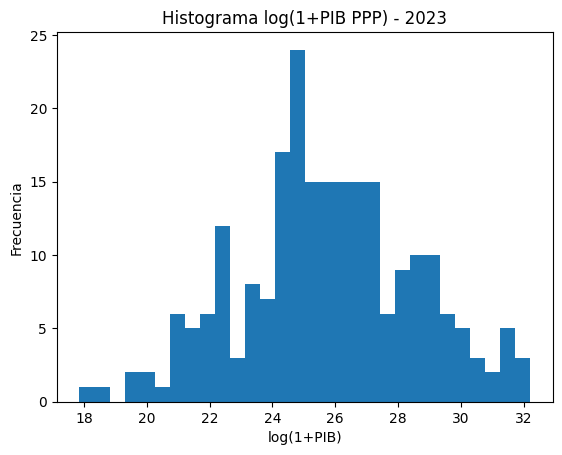

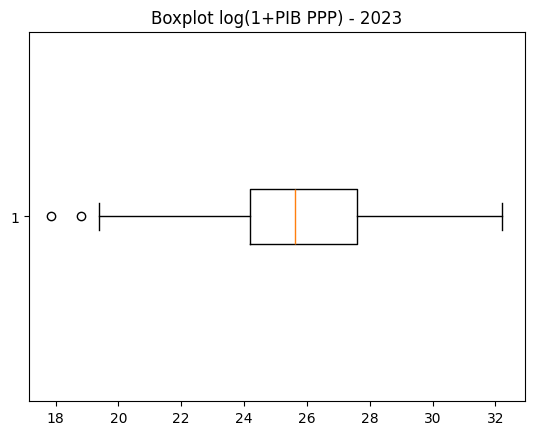

In [ ]:
# Ocuparemos Log para que no quede aplastado



import matplotlib.pyplot as plt
import numpy as np

pib = df_paises[col_pib].astype(float)

plt.figure()
plt.hist(np.log1p(pib), bins=30)
plt.title("Histograma log(1+PIB PPP) - 2023")
plt.xlabel("log(1+PIB)")
plt.ylabel("Frecuencia")
plt.show()

plt.figure()
plt.boxplot(np.log1p(pib), vert=False)
plt.title("Boxplot log(1+PIB PPP) - 2023")
plt.show()


In [ ]:
import plotly.express as px

fig = px.choropleth(
    df_paises,
    locations=col_pais,
    locationmode="ISO-3",
    color=col_pib,
    hover_name=col_pais,
    title="PIB PPP por país (2023)"
)
fig.show()


In [ ]:
df_paises[[col_pais, col_pib]].sort_values(col_pib, ascending=False).head(10)


,country,NY.GDP.MKTP.PP.KD
247,IBT,9.742739e+13
248,IBD,8.798229e+13
226,PST,6.561784e+13
243,LTE,5.536760e+13
259,EAS,5.507806e+13
257,TEA,4.167729e+13
260,EAR,4.155577e+13
255,ECS,4.077281e+13
175,CHN,3.200488e+13
10,USA,2.497712e+13


In [ ]:
df_paises[[col_pais, col_pib]].sort_values(col_pib, ascending=True).head(10)


,country,NY.GDP.MKTP.PP.KD
15,TUV,5.705451e+07
79,NRU,1.469237e+08
92,MHL,2.640863e+08
66,PLW,2.911832e+08
114,KIR,4.162215e+08
88,FSM,4.296519e+08
21,TON,7.353608e+08
7,VUT,1.030020e+09
161,DMA,1.215685e+09
51,STP,1.279326e+09


En este escenario podemos ver el top 10 de los paises con mayor y menos PIB, de esta manera contarstamos con escenarios logicos que uno puede tender a pensar a visualizar, si bien no es un requeriemiento si podriamos hacer algun tipo de inferencia sobre el sistema que tiene cada pais y que tan prosperos.

En la etapa 1 pudimos ver como se estan comportando los datos que estamos utilizando y que valores Nan teniamos para la investigacion, a lo cual, utilizmaos el criterios que "$>15\%$" se borrarian ya que seria una columna muy contaminada y, para el resto de variables utilizariamos algun criterio para reemplazar, como sabemos qe son variables macros decidimos utilizar una imputacion a traves de la mediana por robustes.

In [ ]:
df_paises.head(10)

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,NV.IND.TOTL.CD,NV.SRV.TOTL.CD,EG.CFT.ACCS.ZS,EN.GHG.CO2.IP.MT.CE.AR5,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,8.526678e+10,49.843240,6232464.0,1.677096,16340822.0,8559888.0,52.383460,7780934.0,...,1.192936e+10,1.777929e+10,30.7,0.9636,65.013,62.775000,60.226,7.500000,77.000000,38.4266
1,ZMB,Zambia,7.612916e+10,46.170619,7147630.0,2.794068,20723965.0,10467717.0,50.510204,10256248.0,...,9.682008e+09,1.566890e+10,9.2,1.2905,68.673,66.349000,63.936,2.300000,16.800000,33.0000
3,PSE,West Bank and Gaza,2.769440e+10,44.578549,5534037.0,2.393265,5165775.0,2598445.0,50.301172,2567330.0,...,2.780800e+09,1.044720e+10,88.7,2.1222,71.502,65.170000,59.691,74.126485,95.619033,86.6377
5,VNM,Viet Nam,1.359364e+12,48.623244,56799003.0,0.671429,100352192.0,51201223.0,51.021529,49150969.0,...,1.630505e+11,1.834968e+11,98.7,50.1898,79.264,74.588000,69.877,98.700000,99.400000,78.0800
7,VUT,Vanuatu,1.030020e+09,46.126995,115453.0,2.324816,320409.0,158611.0,49.502667,161798.0,...,1.840653e+10,3.207388e+10,20.6,0.0011,73.927,71.477000,69.445,9.000000,52.300000,45.7313
8,UZB,Uzbekistan,3.567971e+11,35.481852,13809189.0,2.021146,35652307.0,17670093.0,49.562271,17982214.0,...,3.184404e+10,4.511403e+10,78.1,10.0494,75.401,72.388000,69.450,70.900000,96.800000,89.0136
9,URY,Uruguay,1.052313e+11,46.719084,1761109.0,-0.083552,3388081.0,1745071.0,51.506177,1643010.0,...,1.306518e+10,5.120338e+10,100.0,0.3938,81.920,78.138000,74.192,100.000000,100.000000,89.8960
10,USA,United States,2.497712e+13,45.567571,172300802.0,0.831493,336806231.0,167569583.0,49.752519,169236648.0,...,1.840653e+10,3.207388e+10,100.0,157.4261,81.100,78.385366,75.800,100.000000,100.000000,93.1444
11,GBR,United Kingdom,3.602178e+12,47.539585,34950053.0,1.304980,68492000.0,34773417.0,50.770041,33718583.0,...,6.045028e+11,2.477450e+12,100.0,10.4816,83.208,81.238098,79.362,100.000000,100.000000,96.2988
12,ARE,United Arab Emirates,7.363772e+11,23.050942,6793436.0,3.977171,10483751.0,3772859.0,35.987679,6710892.0,...,2.372743e+11,2.813547e+11,100.0,19.1110,84.204,82.909000,81.978,100.000000,100.000000,100.0000


In [ ]:
df_paises.isna().sum()

,0
country,0
Country,0
NY.GDP.MKTP.PP.KD,0
SL.TLF.TOTL.FE.ZS,0
SL.TLF.TOTL.IN,0
SP.POP.GROW,0
SP.POP.TOTL,0
SP.POP.TOTL.FE.IN,0
SP.POP.TOTL.FE.ZS,0
SP.POP.TOTL.MA.IN,0


## ETAPA 2



PCA se usa para: simplificar, visualizar, evitar colinealidad, mejorar estabilidad.

In [ ]:
df_paises["pib_categoria"] = pd.qcut(df_paises["NY.GDP.MKTP.PP.KD"], q=3, labels=["bajo","medio","alto"])
df_paises["pib_categoria"].value_counts()

# Creamos una categoria que usaremos para calificar

,count
pib_categoria,
medio,77
bajo,76
alto,76


In [ ]:
# Analicemos que piases tienen mas bajo PIB

col_pib = "NY.GDP.MKTP.PP.KD"

df_paises[df_paises["pib_categoria"]=="bajo"][[col_pais, col_pib]] \
  .sort_values(col_pib, ascending=True) \
  .head(10)


,country,NY.GDP.MKTP.PP.KD
15,TUV,5.705451e+07
79,NRU,1.469237e+08
92,MHL,2.640863e+08
66,PLW,2.911832e+08
114,KIR,4.162215e+08
88,FSM,4.296519e+08
21,TON,7.353608e+08
7,VUT,1.030020e+09
161,DMA,1.215685e+09
51,STP,1.279326e+09


In [ ]:
col_pib = "NY.GDP.MKTP.PP.KD"
col_pais = "country"

ranking = df_paises[[col_pais, col_pib, "pib_categoria"]].sort_values(col_pib).reset_index(drop=True)
ranking[ranking[col_pais]=="CHL"].index[0]


# Analizamos posicion de Chile

np.int64(158)

In [ ]:
col_pais = "country" if "country" in df_paises.columns else "economy"

categoria_chile = df_paises.loc[df_paises[col_pais]=="CHL", "pib_categoria"].iloc[0]
print("Chile está en la categoría:", categoria_chile)


Chile está en la categoría: alto


En este caso quise tambien analizar el caso de en que categoria se encuentra Chile en terminos del PIB, lo cual nos muestra un resultado bastante positivo donde chile posee una categoria alta en terminos de PIB, sin embargo, igual segun papers y analogia Chile tampoco es un pais que se encuentra en su "optimo" de la economia, entonces aveces uno puede plantearse si realmente esta mal o simplemente hay paises muchos peores , por lo que nos suben de categoria.

In [ ]:
# Ahora dado al analisis anterior que fue desicion de nosotros hacerlo
# crearemos la Matriz de variables para el PCA
# Sabemos que PCA trabaja con números
# Sacamos lo que es la variable PIB por que puede contaminar , ya que
# es lo que estamos analizando
# armamos variables explicativas


import numpy as np

col_pib = "NY.GDP.MKTP.PP.KD"
col_anio = "time"

# Seleccionamos solo variables numéricas
matriz_variables = df_paises.select_dtypes(include=np.number).copy()

# Excluimos PIB y año (no deben entrar al PCA)
matriz_variables = matriz_variables.drop(columns=[col_pib, col_anio], errors="ignore")

print("Dimensión de matriz_variables:", matriz_variables.shape)
matriz_variables.head()


Dimensión de matriz_variables: (229, 33)


,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,...,NV.IND.TOTL.CD,NV.SRV.TOTL.CD,EG.CFT.ACCS.ZS,EN.GHG.CO2.IP.MT.CE.AR5,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.ZS
0,49.843240,6232464.0,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,9920197.0,0.715777,...,1.192936e+10,1.777929e+10,30.7,0.9636,65.013,62.775,60.226,7.500000,77.000000,38.4266
1,46.170619,7147630.0,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,11392257.0,2.015370,...,9.682008e+09,1.566890e+10,9.2,1.2905,68.673,66.349,63.936,2.300000,16.800000,33.0000
3,44.578549,5534037.0,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,678902.0,0.422602,...,2.780800e+09,1.044720e+10,88.7,2.1222,71.502,65.170,59.691,74.126485,95.619033,86.6377
5,48.623244,56799003.0,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,62088011.0,-0.264917,...,1.630505e+11,1.834968e+11,98.7,50.1898,79.264,74.588,69.877,98.700000,99.400000,78.0800
7,46.126995,115453.0,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,249069.0,2.310596,...,1.840653e+10,3.207388e+10,20.6,0.0011,73.927,71.477,69.445,9.000000,52.300000,45.7313


In [ ]:
matriz_variables.columns[:20]

# Aca analizamos si no mezclamos algun codigo de "id"
# ya que esos "id" son para categorizar algunas cosas
# , tales como 1 si el pais es tanto y etc

Index(['SL.TLF.TOTL.FE.ZS', 'SL.TLF.TOTL.IN', 'SP.POP.GROW', 'SP.POP.TOTL',
       'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN',
       'SP.POP.TOTL.MA.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS',
       'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'FP.CPI.TOTL.ZG',
       'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.IND.MANF.CD',
       'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.ZS'],
      dtype='object')

In [ ]:
# Procedemos a estandarizar los datos para que ninguno tenga dominio en otro


from sklearn.preprocessing import StandardScaler
import numpy as np

# Entrenamos lo que va estandarizar
escalador = StandardScaler()

# Ajustamos y transformamos:
# fit: calcula la media y la desviación estándar de cada columna
# transform: aplica (x - media) / desviación a cada dato
matriz_escalada = escalador.fit_transform(matriz_variables)

# 3) Chequeos rápidos (para confirmar que quedó como esperábamos)
print("Media aproximada (primeras 5 variables):", np.mean(matriz_escalada, axis=0)[:5])
print("Desv. estándar aproximada (primeras 5 variables):", np.std(matriz_escalada, axis=0)[:5])


Media aproximada (primeras 5 variables): [-3.51489822e-16  0.00000000e+00  1.74532877e-17  0.00000000e+00
  4.65421006e-17]
Desv. estándar aproximada (primeras 5 variables): [1. 1. 1. 1. 1.]


Si nos damos cuenta al estandarizar , logramos que posean valores de media 0 y desviacion estandar de 1 siguiendo la distribución normal.  

In [ ]:
# Ajustar modelo

from sklearn.decomposition import PCA
import numpy as np

pca = PCA()  # Creamos el PCA sin fijar componentes (para mirar toda la varianza)


pca.fit(matriz_escalada) #Ajustamos el PCA usando la matriz ya estandarizados

varianza_explicada = pca.explained_variance_ratio_ # Varianza explicada por cada componente (CP1, CP2, ...)


varianza_acumulada = np.cumsum(varianza_explicada) #Varianza explicada acumulada


print("Varianza explicada (primeras 5 CP):", varianza_explicada[:5])
print("Varianza acumulada (primeras 5 CP):", varianza_acumulada[:5])


Varianza explicada (primeras 5 CP): [0.32064311 0.23687326 0.09775581 0.08818799 0.04820068]
Varianza acumulada (primeras 5 CP): [0.32064311 0.55751638 0.65527219 0.74346017 0.79166086]


CA está encontrando nuevos “ejes” que capturan la mayor parte de la variación conjunta de tus indicadores.

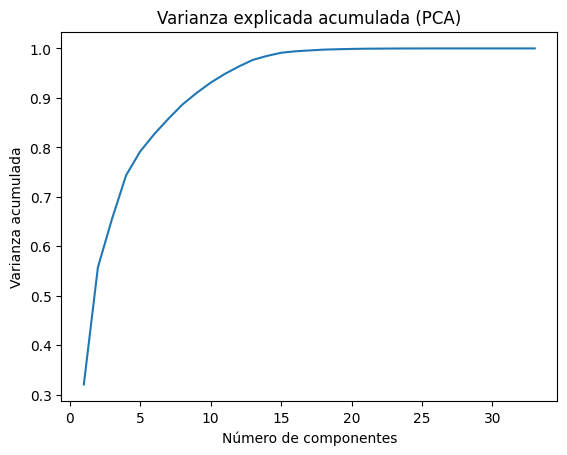

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada)
plt.title("Varianza explicada acumulada (PCA)")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.show()


# Aca nos dice cuánta información del dataset original (tus indicadores)
# estás reteniendo cuando te quedas con los primeros kcomponentes

Podemos ver que los primeros componentes capturan mucha estructura, esto suele pasar cuando tus variables están correlacionadas. Avanzamos vemos que cada componente adicional aporta cada vez menos (rendimientos decrecientes). En este caso usaremos el metodo de codo o un umbral , aun que el umbral no se nos exige que tanto debe ser y el grafico nos muestra claramente el contexto que se esta tratando.




In [ ]:
pca_2 = PCA(n_components=2)
componentes_2 = pca_2.fit_transform(matriz_escalada)

print("Varianza explicada por CP1 y CP2:", pca_2.explained_variance_ratio_)
print("Varianza acumulada (CP1+CP2):", pca_2.explained_variance_ratio_.sum())


Varianza explicada por CP1 y CP2: [0.32064311 0.23687326]
Varianza acumulada (CP1+CP2): 0.5575163786612964


In [ ]:
import pandas as pd

df_pca_2 = pd.DataFrame(componentes_2, columns=["CP1", "CP2"])

col_pais = "economy" if "economy" in df_paises.columns else "country"
df_pca_2["pais"] = df_paises[col_pais].values

if "pib_categoria" in df_paises.columns:
    df_pca_2["pib_categoria"] = df_paises["pib_categoria"].values

df_pca_2.head()

# f con CP1, CP2 y agregas país y (si existe) pib_categoria. Aca es para poder graficar y analizar por grupos

,CP1,CP2,pais,pib_categoria
0,-0.939212,-3.759728,ZWE,medio
1,-0.977065,-4.177222,ZMB,medio
2,-0.913962,-0.179886,PSE,bajo
3,-0.453809,0.743731,VNM,alto
4,-0.901134,-3.103096,VUT,bajo


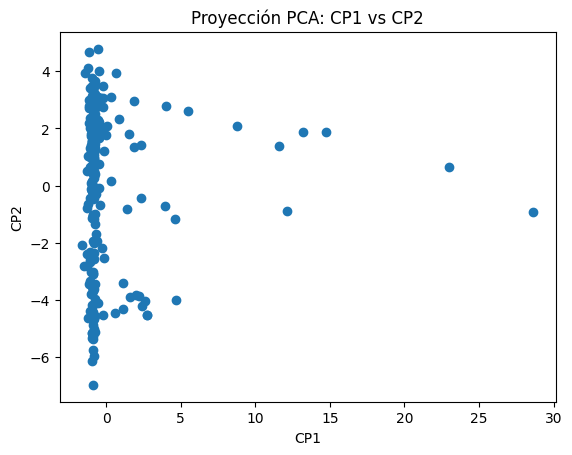

In [ ]:
plt.figure()
plt.scatter(df_pca_2["CP1"], df_pca_2["CP2"])
plt.title("Proyección PCA: CP1 vs CP2")
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.show()


In [ ]:
import plotly.express as px

if "pib_categoria" in df_pca_2.columns:
    fig = px.scatter(df_pca_2, x="CP1", y="CP2", color="pib_categoria", hover_name="pais",
                     title="PCA (CP1 vs CP2) coloreado por categoría de PIB")
    fig.show()
# Vemos segun el PIB para entenderlo mejor

- CP1 es la combinación de indicadores que captura la mayor variabilidad del dataset (después de estandarizar)

- CP2 captura la segunda mayor variabilidad, independiente de CP1

En este caso CP1 está separando mucho a algunos países (cola a la derecha), lo que nos dice que hay outliers en “escala/tamaño” o combinaciones de indicadores (ej. países gigantes en población, fuerza laboral, exportaciones, etc.), y
CP1 está capturando una dimensión muy dominante para esos países. Por otro lado, CP2, en cambio, no separa tan nítido por PIB: hay mezcla vertical de colores → CP2 probablemente captura otra dimensión



In [ ]:
col_pib = "NY.GDP.MKTP.PP.KD"

# Top 10 países con CP1 más alto
df_pca_2.sort_values("CP1", ascending=False)[["pais","CP1","CP2","pib_categoria"]].head(10)

# Top 10 países con CP1 más bajo
df_pca_2.sort_values("CP1", ascending=True)[["pais","CP1","CP2","pib_categoria"]].head(10)


# Datos outliers

,pais,CP1,CP2,pib_categoria
147,DJI,-1.598229,-2.080805,bajo
139,SWZ,-1.488432,-2.800760,bajo
70,NLD,-1.403385,3.915968,alto
155,COG,-1.293576,-2.801651,bajo
133,GAB,-1.286726,0.495013,bajo
173,BWA,-1.282370,-0.774166,bajo
73,NAM,-1.271394,-2.398920,bajo
92,LUX,-1.247223,4.091315,medio
94,LBY,-1.240583,1.047543,medio
35,SOM,-1.229145,-4.626852,bajo


In [ ]:
cargas = pd.DataFrame(
    pca_2.components_.T,
    index=matriz_variables.columns,
    columns=["CP1", "CP2"]
)

# Variables más influyentes en CP1 y CP2 (por valor absoluto)
cargas["abs_CP1"] = cargas["CP1"].abs()
cargas["abs_CP2"] = cargas["CP2"].abs()

top_cp1 = cargas.sort_values("abs_CP1", ascending=False).head(10)[["CP1"]]
top_cp2 = cargas.sort_values("abs_CP2", ascending=False).head(10)[["CP2"]]

print("Top 10 variables que más definen CP1:")
display(top_cp1)

print("Top 10 variables que más definen CP2:")
display(top_cp2)


Top 10 variables que más definen CP1:


,CP1
SP.URB.TOTL,0.304738
NV.AGR.TOTL.CD,0.304468
SL.TLF.TOTL.IN,0.304377
SP.POP.TOTL.MA.IN,0.299225
SP.POP.TOTL,0.299210
SP.POP.TOTL.FE.IN,0.299173
EN.GHG.CO2.IP.MT.CE.AR5,0.294039
NV.IND.TOTL.CD,0.291975
NV.IND.MANF.CD,0.288163
SP.RUR.TOTL,0.282405


Top 10 variables que más definen CP2:


,CP2
EG.CFT.ACCS.ZS,0.332638
SP.DYN.LE00.FE.IN,0.328340
SP.DYN.LE00.IN,0.325246
EG.CFT.ACCS.RU.ZS,0.322451
SP.DYN.LE00.MA.IN,0.316829
IT.NET.USER.ZS,0.313322
EG.CFT.ACCS.UR.ZS,0.308534
SP.URB.TOTL.IN.ZS,0.265150
SP.RUR.TOTL.ZS,-0.265150
SP.URB.GROW,-0.226548


In [ ]:
df_pca_2.sort_values("CP1", ascending=False)[["pais","CP1","CP2","pib_categoria"]].head(10)


,pais,CP1,CP2,pib_categoria
215,IBT,28.636704,-0.936584,alto
216,IBD,22.969800,0.663467,alto
223,EAS,14.771171,1.861811,alto
211,LTE,13.202867,1.859223,alto
224,EAR,12.126603,-0.891922,alto
222,TEA,11.576078,1.375880,alto
159,CHN,8.758877,2.078489,alto
220,ECS,5.498567,2.596453,alto
212,IDA,4.703542,-4.000842,alto
200,TSA,4.636609,-1.177530,alto


In [ ]:
df_pca_2.sort_values("CP1", ascending=False)[["pais"]].head(30)


,pais
215,IBT
216,IBD
223,EAS
211,LTE
224,EAR
222,TEA
159,CHN
220,ECS
212,IDA
200,TSA


Nos dimos cuenta que en este caso se estan mezclando valores, por que tenemos codigos que no solo solo Paises, entonces vamos a filtrar para que solo veamos paises

In [ ]:
!pip -q install pycountry


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 50.9 MB/s eta 0:00:00


Realizo de nuevo lo antes hecho

In [ ]:
# PASO A: Quedarnos SOLO con países (códigos ISO-3 reales)

col_pais = "country" if "country" in df_paises.columns else "economy"

try:
    import pycountry
    iso3_validos = {c.alpha_3 for c in pycountry.countries}

    df_paises_paises = df_paises[df_paises[col_pais].isin(iso3_validos)].copy()

    print("Filas antes:", df_paises.shape[0])
    print("Filas después (solo países):", df_paises_paises.shape[0])
except Exception as e:
    print("No pude usar pycountry:", e)
    print("Si te pasa esto, dime si tienes columna 'region' para filtrar Aggregates.")


Filas antes: 229
Filas después (solo países): 197


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

col_pib = "NY.GDP.MKTP.PP.KD"
col_anio = "time"

#Matriz de variables (solo numéricas, sin PIB ni año)
matriz_variables = df_paises_paises.select_dtypes(include=np.number).copy()
matriz_variables = matriz_variables.drop(columns=[col_pib, col_anio], errors="ignore")

print("Dimensión matriz_variables:", matriz_variables.shape)

#Estandarización
escalador = StandardScaler()
matriz_escalada = escalador.fit_transform(matriz_variables)

print("Check media (primeras 5):", np.mean(matriz_escalada, axis=0)[:5])
print("Check std (primeras 5):", np.std(matriz_escalada, axis=0)[:5])


Dimensión matriz_variables: (197, 33)
Check media (primeras 5): [ 1.25787705e-15 -9.01703979e-18  1.12712997e-16  0.00000000e+00
  2.70511194e-17]
Check std (primeras 5): [1. 1. 1. 1. 1.]


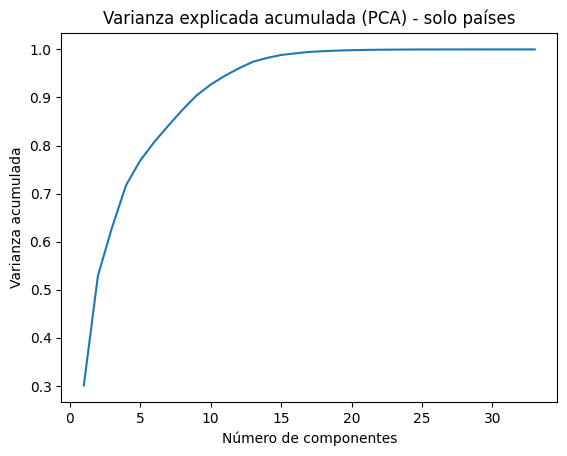

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca_total = PCA()
pca_total.fit(matriz_escalada)

varianza_acumulada = np.cumsum(pca_total.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada)
plt.title("Varianza explicada acumulada (PCA) - solo países")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
componentes_2 = pca_2.fit_transform(matriz_escalada)

df_pca_2 = pd.DataFrame(componentes_2, columns=["CP1","CP2"])
df_pca_2["pais"] = df_paises_paises[col_pais].values

if "pib_categoria" in df_paises_paises.columns:
    df_pca_2["pib_categoria"] = df_paises_paises["pib_categoria"].values

print("Varianza explicada CP1 y CP2:", pca_2.explained_variance_ratio_)
print("Varianza acumulada CP1+CP2:", pca_2.explained_variance_ratio_.sum())


Varianza explicada CP1 y CP2: [0.30087785 0.22823094]
Varianza acumulada CP1+CP2: 0.52910878797505


Con solo dos componentes principales logramos resumir aproximadamente el 52.9% de la variabilidad total de los 33 indicadores estandarizados. CP1 captura la mayor parte (30.1%) y CP2 agrega una porción relevante adicional (22.8%)

In [ ]:
# Buscamos el K


from sklearn.decomposition import PCA
import numpy as np

pca_total = PCA().fit(matriz_escalada)
var_acum = np.cumsum(pca_total.explained_variance_ratio_)

for u in [0.70, 0.80, 0.90]:
    k = int(np.argmax(var_acum >= u) + 1)
    print(f"Umbral {u:.0%}: k = {k}, var_acum = {var_acum[k-1]:.3f}")


Umbral 70%: k = 4, var_acum = 0.718
Umbral 80%: k = 6, var_acum = 0.807
Umbral 90%: k = 9, var_acum = 0.904


In [ ]:
# Realizamos comparacion


import pandas as pd

cargas = pd.DataFrame(
    pca_2.components_.T,
    index=matriz_variables.columns,
    columns=["CP1","CP2"]
)

top_cp1 = cargas["CP1"].abs().sort_values(ascending=False).head(10)
top_cp2 = cargas["CP2"].abs().sort_values(ascending=False).head(10)

print("Top 10 variables que más definen CP1:")
display(cargas.loc[top_cp1.index].sort_values("CP1", key=lambda s: s.abs(), ascending=False))

print("Top 10 variables que más definen CP2:")
display(cargas.loc[top_cp2.index].sort_values("CP2", key=lambda s: s.abs(), ascending=False))


Top 10 variables que más definen CP1:


,CP1,CP2
SP.URB.TOTL,0.306549,-0.070762
NV.AGR.TOTL.CD,0.303620,-0.076781
SL.TLF.TOTL.IN,0.303379,-0.086151
SP.POP.TOTL.FE.IN,0.292744,-0.094010
SP.POP.TOTL,0.292257,-0.094012
SP.POP.TOTL.MA.IN,0.291740,-0.093997
EN.GHG.CO2.IP.MT.CE.AR5,0.289685,-0.054344
NV.IND.TOTL.CD,0.288823,-0.027222
NV.IND.MANF.CD,0.283952,-0.031358
NV.SRV.TOTL.CD,0.281905,-0.006044


Top 10 variables que más definen CP2:


,CP1,CP2
EG.CFT.ACCS.ZS,0.079187,0.323771
SP.DYN.LE00.FE.IN,0.075866,0.321309
SP.DYN.LE00.IN,0.076140,0.318154
EG.CFT.ACCS.RU.ZS,0.075413,0.313807
SP.DYN.LE00.MA.IN,0.075575,0.309408
IT.NET.USER.ZS,0.078124,0.308709
EG.CFT.ACCS.UR.ZS,0.078697,0.298254
SP.RUR.TOTL.ZS,-0.044597,-0.265968
SP.URB.TOTL.IN.ZS,0.044597,0.265968
SP.URB.GROW,-0.056728,-0.204378


Podemos ver que cada CPi , $∀ i = 1, 2$ se compone de :


CP1 representa principalmente un eje de escala/tamaño económico-demográfico, porque está dominado por variables en niveles: población (total/urbana), fuerza laboral y valor agregado de sectores (agricultura/industria/manufactura/servicios). Países con CP1 alto tienden a ser economías y poblaciones grandes

CP2 captura un eje de desarrollo/condiciones de vida y modernización, asociado a mayor acceso a energía limpia, mayor esperanza de vida, mayor uso de internet y mayor urbanización (en oposición a ruralidad)

In [63]:
df_pca_2.sort_values("CP1", ascending=False)[["pais","CP1","CP2","pib_categoria"]].head(10)
df_pca_2.sort_values("CP2", ascending=False)[["pais","CP1","CP2","pib_categoria"]].head(10)


,pais,CP1,CP2,pib_categoria
52,QAT,0.786165,4.614784,medio
47,SMR,0.032440,4.557099,bajo
92,LUX,-0.207694,4.098740,medio
70,NLD,-0.240486,3.813702,alto
118,HKG,0.262674,3.672045,alto
26,SWE,0.510222,3.449087,alto
183,BHR,0.080319,3.433178,medio
40,SGP,0.162450,3.426065,alto
10,UKR,0.772666,3.387395,alto
91,MAC,-0.055701,3.369938,medio


Al ordenar por CP2 observamos que los países con mayor CP2 corresponden, en general, a economías con altos niveles de acceso a energía limpia, esperanza de vida, conectividad digital y urbanización. Esto es coherente con las cargas de CP2, por lo que interpretamos CP2 como un eje de desarrollo/condiciones de vida. En estos casos, CP1 no toma valores extremos, lo que sugiere que estos países no son necesariamente los de mayor escala económica-demográfica, sino que destacan por indicadores de bienestar y modernización. Además, la variable pib_categoria no siempre coincide con CP2, lo que es esperable si la categorización se basa en PIB total: países pequeños pero desarrollados pueden clasificarse como ‘bajo/medio’ en PIB total

In [67]:
import plotly.express as px

fig = px.scatter(df_pca_2, x="CP1", y="CP2",
                 color="pib_categoria" if "pib_categoria" in df_pca_2.columns else None,
                 hover_name="pais",
                 title="PCA: CP1 vs CP2 (solo países)")
fig.show()


Viendo los casos hechos y dados tenemos que:


Elegimos $K= 6$ porque es el mínimo número de componentes que permite retener al menos 80% de la varianza acumulada (≈0.807). Esto entrega un buen equilibrio entre reducción dimensional (de 33 variables a 6) y pérdida de información (se descarta ~19.3%). Usar $K=4$ retiene solo ~71.8% (pérdida mayor), mientras que
$K=9$ retiene ~90.4% pero reduce menos la dimensionalidad y complica la interpretación.

En terminos del grafico tenemos :    

Se ve una cola a la derecha en CP1 con puntos “alto” → CP1 = escala/tamaño.
En CP2 hay mezcla de colores → desarrollo (CP2) no coincide perfecto con tu pib_categoria si esa categoría es PIB total. Se ve una cola a la derecha en CP1 con puntos “alto” → CP1 = escala/tamaño.


## ETAPA 3

In [68]:
# X: tus variables explicativas originales (33 indicadores)
X = matriz_variables.copy()

# y: tu target de clasificación
y = df_paises_paises["pib_categoria"].copy()

print(X.shape)
print(y.value_counts())


(197, 33)
pib_categoria
bajo     74
medio    74
alto     49
Name: count, dtype: int64


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)


In [70]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def evaluar(modelo, Xtr, Xte, ytr, yte, nombre="modelo"):
    modelo.fit(Xtr, ytr)
    pred = modelo.predict(Xte)

    acc = accuracy_score(yte, pred)
    f1  = f1_score(yte, pred, average="macro")

    print(f"\n--- {nombre} ---")
    print(f"Accuracy: {acc:.3f}")
    print(f"F1 macro:  {f1:.3f}")
    print("Matriz confusión:\n", confusion_matrix(yte, pred))

    return {"nombre": nombre, "accuracy": acc, "f1_macro": f1, "modelo": modelo}


2 modelos sin PCA

In [74]:
# importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, cohen_kappa_score
from IPython import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [77]:
# Caso de PCA // Despues de paso 2

X = matriz_variables.copy()
y = df_paises_paises["pib_categoria"].copy()